# Importing Header, SoilPrep, and PlotFunctions

In [1]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


In [2]:
import import_ipynb
from PlotFunctions import *

importing Jupyter notebook from PlotFunctions.ipynb
importing Jupyter notebook from LoadDataMetaData.ipynb


In [3]:
import import_ipynb
from HyperMainVenus import * 

importing Jupyter notebook from HyperMainVenus.ipynb
For:Sand-> ['L1r2', 0.22, 'Spec:', 'none', 'bands: 11'] :mult
For:Sand-> ['L1r2', 0.26, 'Spec:', 'fod_log', 'bands: 11'] :plsr
For:Sand-> ['L1r2', 0.17, 'Spec:', 'log', 'bands: 11'] :svr
For:Sand-> ['L1r2', -0.14, 'Spec:', 'fod', 'bands: 11'] :ridge
For:Sand-> ['L1r2', 0.31, 'Spec:', 'none', 'bands: 11'] :cubist
For:Sand-> ['L1r2', 0.32, 'Spec:', 'fod', 'bands: 11'] :gbrt
For:Silt-> ['L1r2', 0.16, 'Spec:', 'fod', 'bands: 11'] :mult
For:Silt-> ['L1r2', 0.19, 'Spec:', 'none', 'bands: 11'] :plsr
For:Silt-> ['L1r2', 0.1, 'Spec:', 'fod_log', 'bands: 11'] :svr
For:Silt-> ['L1r2', 0.18, 'Spec:', 'log', 'bands: 11'] :ridge
For:Silt-> ['L1r2', 0.21, 'Spec:', 'fod', 'bands: 11'] :cubist
For:Silt-> ['L1r2', 0.08, 'Spec:', 'fod_log', 'bands: 11'] :gbrt
For:Clay-> ['L1r2', 0.25, 'Spec:', 'fod_log', 'bands: 11'] :mult
For:Clay-> ['L1r2', 0.25, 'Spec:', 'fod_log', 'bands: 11'] :plsr
For:Clay-> ['L1r2', -0.08, 'Spec:', 'log', 'bands: 11'] :svr
For:C

interactive(children=(Dropdown(description='method', options=('mult', 'plsr', 'svr', 'ridge', 'cubist', 'gbrt'…

## Loading  Mtree 

In [4]:
with open ('HMtreeVen.pickle', 'rb') as file:
    HMtree = pickle.load(file)
 

In [5]:
with open ('Feature.pickle', 'rb') as file:
    feature_scores = pickle.load(file)
 

In [6]:
with open ('Models.pickle', 'rb') as file:
    model_details = pickle.load(file)
 

 #  Best Models for Sand, Silt, Clay, and TOC.

In [7]:
feature_scores = {}

model_details ={}

In [8]:
#HMtree['cubist']['Sand']['none']['fod2'][100]

##  Sand 

### GBRT

Sand -> [ r2 - **0.32**, Spec - fod, n_bands -11]     <br/><br/>
***Description***: To obtain the best model for sand using gbrt method we trained the model on the first order derivative of the  smoothed spectra which was  resampled to the 11 bands provided by Venus.

In [9]:
sand_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 40, random_state = 42) 
sand_model_gbrt.fit(fod_sampled11,  T[0])

GradientBoostingRegressor(max_depth=5, n_estimators=40, random_state=42)

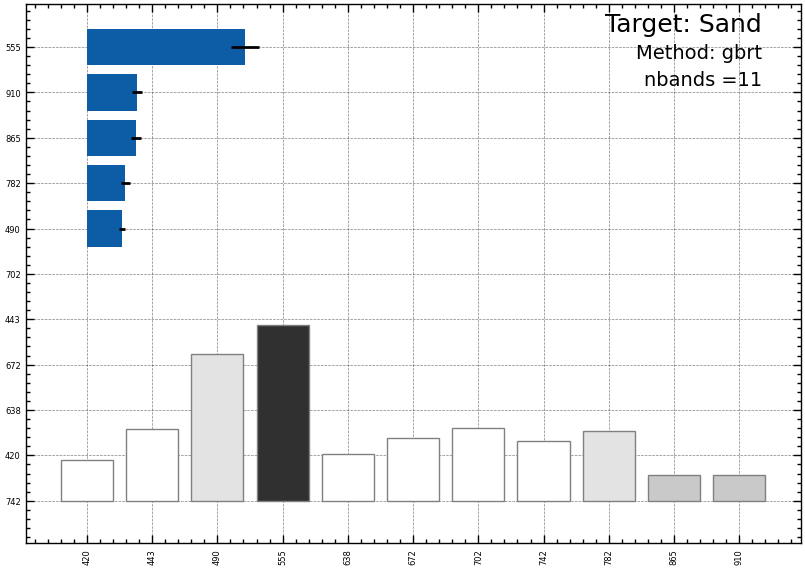

In [10]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, fod_sampled11, T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'gbrt', 'spec': fod_sampled11, 'spec_proc': 'fod', 'n_bands': 11}
show_important_features_for ('Sand', model_details, feature_scores, 5, 50, 20)

## Silt

### Cubist

Silt -> [ r2 - **0.21**, Spec - fod, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for silt using cubist method we trained the model on the first order derivative of the smoothed spectra which was resampled to the 11 bands provided by Venus.


In [11]:
silt_model_cubist = Cubist(n_committees = 5, n_rules = 10) 
silt_model_cubist.fit(fod_sampled11,  T[1])

Cubist(n_committees=5, n_rules=10)

In [12]:
feature_scores['Silt'] = permutation_importance(silt_model_cubist, fod_sampled11, T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'cubist', 'spec': fod_sampled11, 'spec_proc': 'fod', 'n_bands': 11}

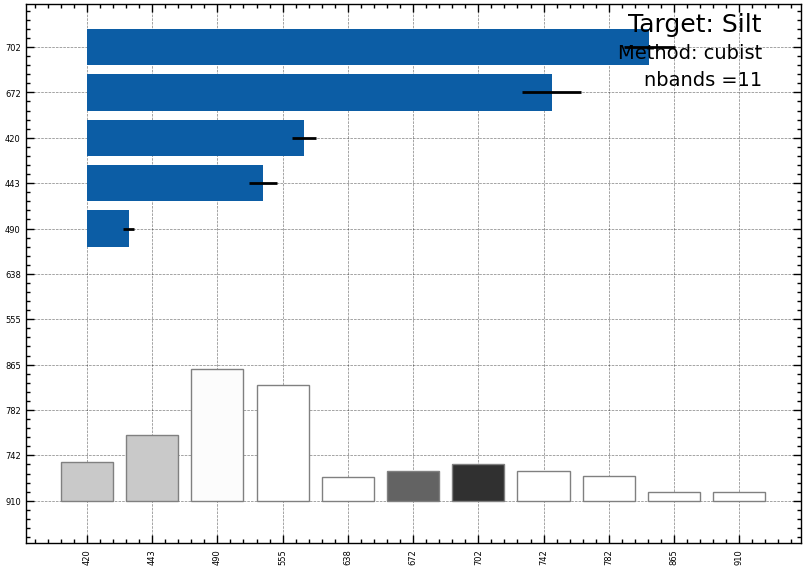

In [13]:
show_important_features_for ('Silt', model_details, feature_scores, 1, 40, 2)

## Clay 

### Kernel Ridge Regression

Clay -> [ r2 - **0.26**, Spec - fod_log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for clay using kernel ridge regression method we trained the model on the first order derivative of the logarithmic transformed spectra which was resampled to the 11 bands provided by Venus.


In [14]:
clay_model_kernelridge = KernelRidge(alpha = 0.0002) 
clay_model_kernelridge.fit(fod_log11,  T[2])

KernelRidge(alpha=0.0002)

In [15]:
feature_scores['Clay'] = permutation_importance(clay_model_kernelridge, fod_log11, T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'ridge', 'spec': fod_log11, 'spec_proc': 'fod_log', 'n_bands': 11}

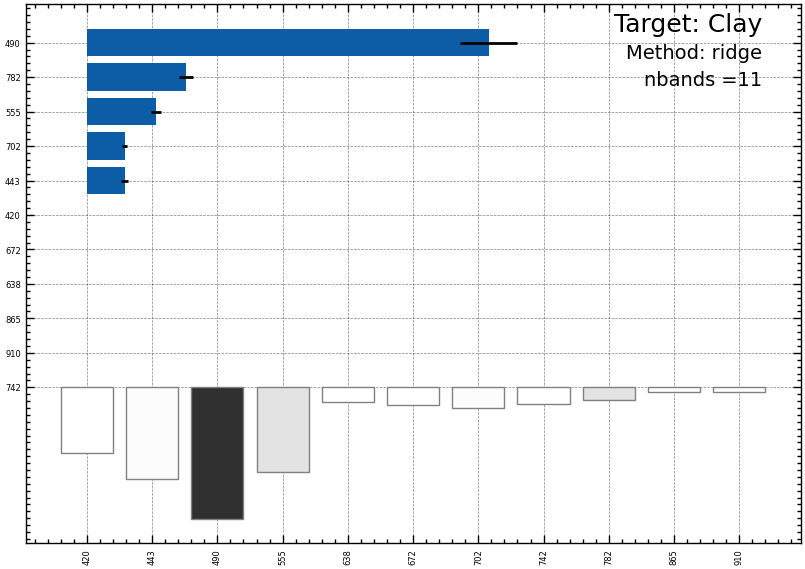

In [16]:
show_important_features_for ('Clay', model_details, feature_scores, 0.5, 10, 2)

## TOC

###  Support Vector Regression 

TOC -> [ r2 - **0.42**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for TOC using svr method we trained the model on the logarithmic transformed spectra which was resampled to the 11 bands provided by Venus.


In [17]:
TOC_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')
TOC_model_svr.fit(sampled_log11,  T[3])

SVR(C=10, gamma=0.01, kernel='linear')

In [18]:
feature_scores['TOC'] = permutation_importance(TOC_model_svr, sampled_log11, T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'svr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

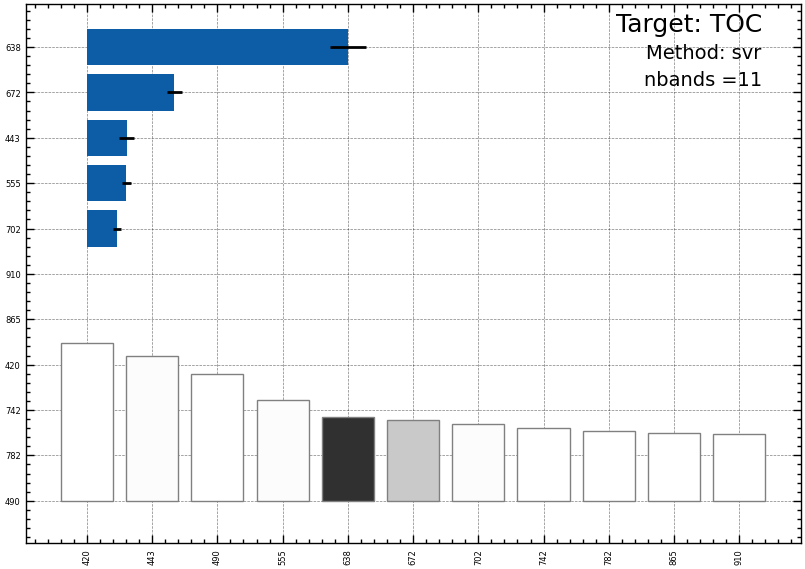

In [19]:
show_important_features_for ('TOC', model_details, feature_scores, 4,1.5, 2)

In [20]:
# with open ('Feature.pickle', 'wb') as file:
#     pickle.dump(feature_scores, file)
     

In [21]:
# with open ('Models.pickle', 'wb') as file:
#     pickle.dump(model_details, file)